<a href="https://colab.research.google.com/github/Adabot123/NN/blob/main/Bigram_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
min(len(w) for w in words)

2

In [ ]:
max(len(w) for w in words)

15

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [ ]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [ ]:
import torch

N = torch.zeros((27,27), dtype = torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1,ch2)
    b[bigram] = b.get(bigram, 0) + 1
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

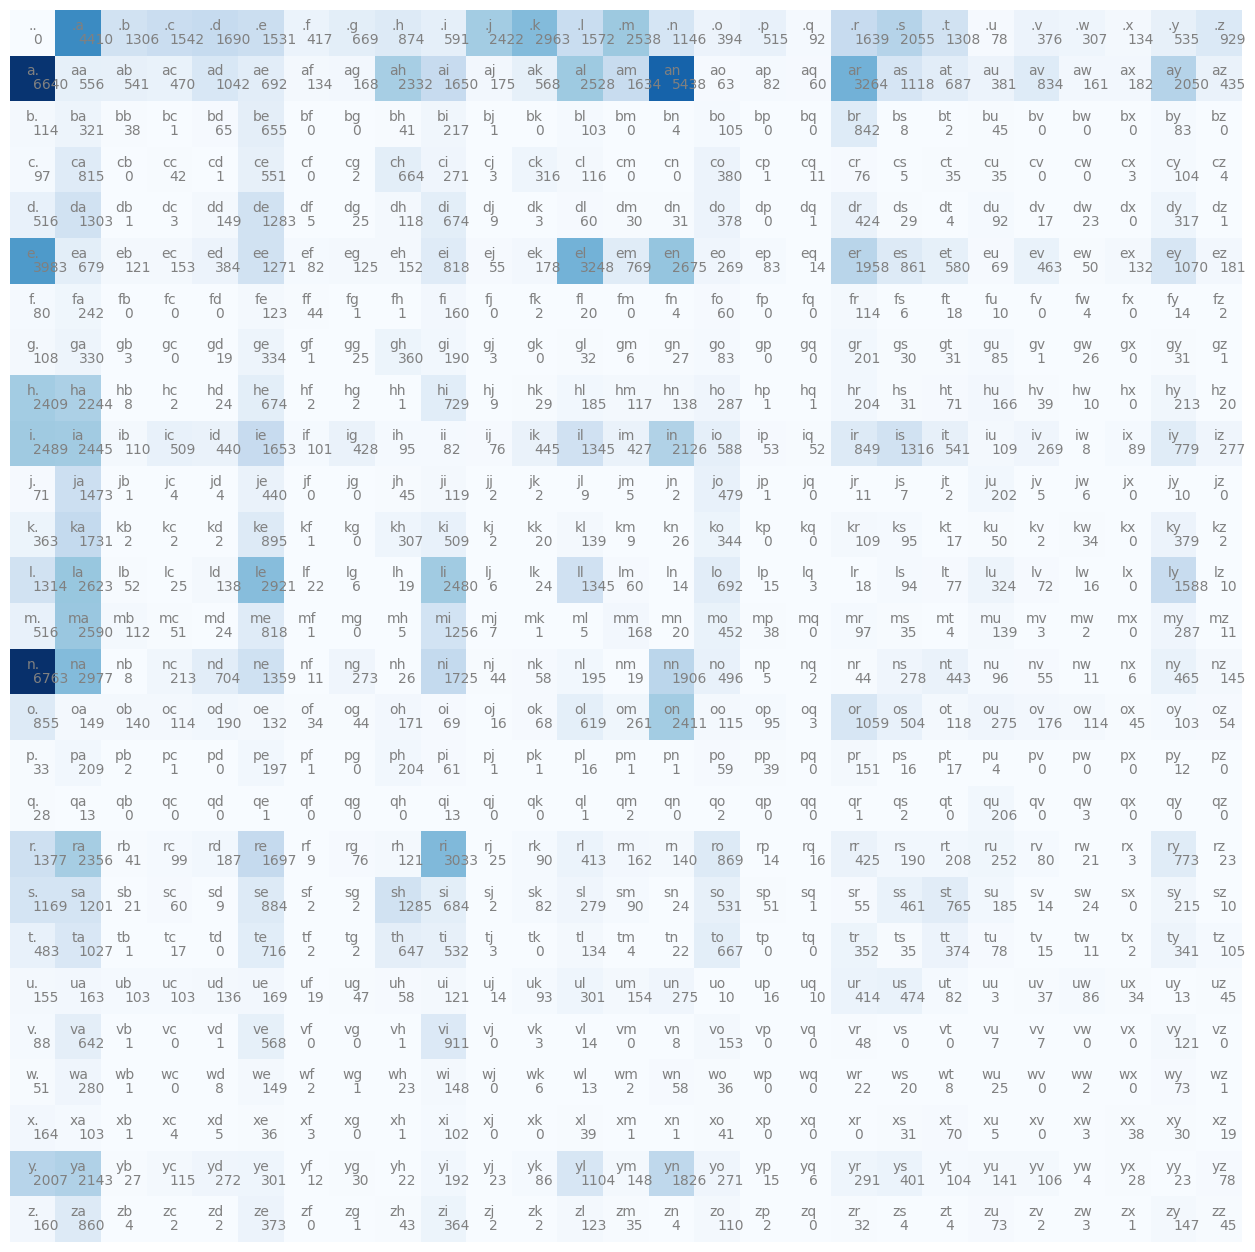

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
    plt.text(j, i, N[i,j].item(), va = 'top', color = 'gray')
plt.axis('off');

In [ ]:
P = N.float()
P /= P.sum(1, keepdim = True)

In [ ]:
stoi.items()

dict_items([('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6), ('g', 7), ('h', 8), ('i', 9), ('j', 10), ('k', 11), ('l', 12), ('m', 13), ('n', 14), ('o', 15), ('p', 16), ('q', 17), ('r', 18), ('s', 19), ('t', 20), ('u', 21), ('v', 22), ('w', 23), ('x', 24), ('y', 25), ('z', 26), ('.', 0)])

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  out = []
  ix = 0
  while True:
    p = P[ix]
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [ ]:
log_likelihood = 0.0
n=0
for w in words[:3]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    print(f'{ch1}{ch2}: {prob:4f} {logprob: .4f}')

nll = -log_likelihood
print(f'{nll/n}')

.e: 0.047794 -3.0408
em: 0.037654 -3.2793
mm: 0.025294 -3.6772
ma: 0.389943 -0.9418
a.: 0.195957 -1.6299
.o: 0.012300 -4.3982
ol: 0.078019 -2.5508
li: 0.177676 -1.7278
iv: 0.015197 -4.1867
vi: 0.354061 -1.0383
ia: 0.138128 -1.9796
a.: 0.195957 -1.6299
.a: 0.137671 -1.9829
av: 0.024613 -3.7045
va: 0.249514 -1.3882
a.: 0.195957 -1.6299
2.424102306365967


In [ ]:
log_likelihood


tensor(-38.7856)

In [ ]:
import torch.nn.functional as F

xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

xenc = F.one_hot(xs, num_classes=27).float()
yenc = F.one_hot(ys, num_classes= 27).float()

xenc.shape

torch.Size([228146, 27])

In [ ]:
yenc.shape

torch.Size([228146, 27])

In [ ]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.7361, -0.1387, -2.2996,  ..., -0.3465,  1.7006,  0.7320],
        [ 0.6478, -0.9516, -0.7343,  ...,  0.2222,  2.0187, -0.1621],
        [-0.1947, -0.6283, -0.4605,  ..., -0.8163,  0.9270, -1.3170],
        ...,
        [ 0.7066,  1.0531, -1.1203,  ..., -0.2536,  0.7486, -0.4583],
        [-0.4831, -0.2741,  0.6421,  ...,  0.6787, -0.2304,  0.3478],
        [ 2.3793,  0.2636, -1.4212,  ..., -0.2880, -0.8451,  0.4581]])

In [ ]:
logits = xenc @ W #log-counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
probs

tensor([[0.0380, 0.0158, 0.0018,  ..., 0.0129, 0.0996, 0.0378],
        [0.0554, 0.0112, 0.0139,  ..., 0.0362, 0.2183, 0.0247],
        [0.0190, 0.0123, 0.0146,  ..., 0.0102, 0.0584, 0.0062],
        ...,
        [0.0601, 0.0850, 0.0097,  ..., 0.0230, 0.0627, 0.0187],
        [0.0175, 0.0216, 0.0539,  ..., 0.0559, 0.0225, 0.0402],
        [0.3087, 0.0372, 0.0069,  ..., 0.0214, 0.0123, 0.0452]])

In [ ]:
counts

tensor([[ 2.0878,  0.8705,  0.1003,  ...,  0.7071,  5.4773,  2.0793],
        [ 1.9114,  0.3861,  0.4798,  ...,  1.2488,  7.5287,  0.8504],
        [ 0.8231,  0.5335,  0.6310,  ...,  0.4421,  2.5270,  0.2679],
        ...,
        [ 2.0270,  2.8665,  0.3262,  ...,  0.7760,  2.1140,  0.6324],
        [ 0.6169,  0.7603,  1.9005,  ...,  1.9712,  0.7942,  1.4160],
        [10.7976,  1.3016,  0.2414,  ...,  0.7498,  0.4295,  1.5810]])

In [ ]:
#create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

#initialize the network

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

#gradient descent

import torch.nn.functional as F



number of examples:  228146
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159
3.758953809738159


In [ ]:
for k in range(1000):
  #forward pass
  xenc = F.one_hot(xs, num_classes = 27).float() #input to the network: one-hot encoding
  logits = xenc @ W #predict the log-counts
  counts = logits.exp() #counts, equivalent to N
  probs = counts/counts.sum(1, keepdims=True) #probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss.item())

  #backward pass
  W.grad = None #set to zero the gradient
  loss.backward()

  #update
  W.data += -70 * W.grad

2.454756498336792
2.454756021499634
2.4547550678253174
2.45475435256958
2.4547536373138428
2.4547531604766846
2.4547524452209473
2.454751491546631
2.4547510147094727
2.4547505378723145
2.454749822616577
2.45474910736084
2.4547486305236816
2.4547476768493652
2.454746961593628
2.454746723175049
2.4547457695007324
2.454745292663574
2.454744338989258
2.4547436237335205
2.4547433853149414
2.454742908477783
2.4547417163848877
2.4547412395477295
2.454740524291992
2.454739809036255
2.4547393321990967
2.4547383785247803
2.454738140106201
2.454737424850464
2.4547367095947266
2.4547359943389893
2.454735517501831
2.4547345638275146
2.4547343254089355
2.454733371734619
2.454732894897461
2.4547324180603027
2.4547314643859863
2.454730749130249
2.454730272293091
2.4547300338745117
2.4547290802001953
2.454728603363037
2.4547278881073
2.4547271728515625
2.4547266960144043
2.454725980758667
2.4547252655029297
2.4547247886657715
2.454724073410034
2.454723596572876
2.4547231197357178
2.4547221660614014
2.4

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
    logits = xenc @ W #predict log-counts
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims = True) #probabilities for the next character
    # ----------
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
